# Importation des Bibliothèques

In [101]:
import keras
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors, metrics, preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score
from sklearn.metrics import plot_confusion_matrix
import joblib
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Chargement des Caractéristiques déja Extraites
Ici nous allons utilisé les mêmes caractéristiques extraites pour entraîner notre KNN

In [2]:
# Chargement caractéristiques 
x_features_train = joblib.load("../1_Extraction_de_Carct/x_features_train.dat")
y_train = joblib.load("../1_Extraction_de_Carct/y_train.dat")
x_features_test = joblib.load("../1_Extraction_de_Carct/x_features_test.dat")
y_test = joblib.load("../1_Extraction_de_Carct/y_test.dat")

In [3]:
# Afficher les formes de données
x_features_train.shape, y_train.shape,x_features_test.shape,y_test.shape

((50000, 1, 1, 512), (50000, 10), (10000, 1, 1, 512), (10000, 10))

# Réglages des hyper-paramètres du KNN
Nous allons ici tester et trouver les meilleurs paramètres du KNN pour obtenir une bonne précision

In [67]:
# Division des données pour accélérer nos traitements de recherche de bons paramètres 
(x_tr,x_tst,y_tr,y_tst)= train_test_split(
    x_features_train, 
    y_train, 
    test_size=3000,
    train_size=5000)

In [68]:
# Affichage des formes de nouvelles données
x_tr.shape, y_tr.shape,x_tst.shape,y_tst.shape

((5000, 1, 1, 512), (5000, 10), (3000, 1, 1, 512), (3000, 10))

Ici nous allons utiliser 5000 données d’entraînement et 3000 données pour le test

In [69]:
# nous allons vérifier la bonne distribution de nos classes D’entraînement 
classes_list = np.zeros((1,10))
for i in range(y_tr.shape[0]):
    class_index = np.argwhere(y_tr[i]!=0)
    classes_list[0,class_index] = classes_list[0,class_index] + 1
print('Nombre d\'éléments d\'Entraînement par classe : ',classes_list)

Nombre d'éléments d'Entraînement par classe :  [[505. 464. 531. 509. 472. 553. 491. 494. 508. 473.]]


In [70]:
# nous allons vérifier la bonne distribution de nos classes de Test
classes_list = np.zeros((1,10))
for i in range(y_tst.shape[0]):
    class_index = np.argwhere(y_tst[i]!=0)
    classes_list[0,class_index] = classes_list[0,class_index] + 1
print('Nombre d\'éléments de Tests par classe : ',classes_list)

Nombre d'éléments de Tests par classe :  [[308. 319. 294. 284. 309. 300. 328. 289. 293. 276.]]


Nous remarquons que nos données sont bien distribuées, cad environs de 500 éléments d’entraînement par classe et 300 éléments de test par classe.

In [72]:
# Normalisation des données 
x_tr = x_tr.reshape(5000,1*1*512)
x_tst = x_tst.reshape(3000,1*1*512)

In [73]:
#Réglages des hyper-paramètres 
params = {'n_neighbors':[3,2,1,4,5],
          'weights':['distance','uniform'],
          'algorithm':['kd_tree', 'ball_tree','auto','brute'],
           'metric':['euclidean','manhattan']}
#Construcion d'un model qui cherchera les meilleurs hyperparametres
grid_search_cv= GridSearchCV(KNeighborsClassifier(), param_grid=params, n_jobs=-1,verbose=1)
gs_results = grid_search_cv.fit(x_tr,y_tr)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  8.6min finished


In [76]:
#Afficher les meilleurs paramètres 
print("Les meilleurs hype-paramètres sont : \n",gs_results.best_params_)

Les meilleurs hype-paramètres sont : 
 {'algorithm': 'kd_tree', 'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'distance'}


# Création du KNN à base des Paramètres trouvés

In [82]:
# Création de l'objet KNN
KNN = KNeighborsClassifier(algorithm='kd_tree',metric='manhattan',n_neighbors=2,weights='distance')

In [85]:
# Normalisation des données 
x_features_train = x_features_train.reshape(50000,1*1*512)
x_features_test = x_features_test.reshape(10000,1*1*512)

In [86]:
# Entrainement du KNN à base de la totalité de nos caractéristiques extraites
KNN.fit(x_features_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', metric='manhattan', n_neighbors=2,
                     weights='distance')

# Vérification des l'état d'entrainement

In [87]:
# Récupération des prédictions
knn_prediction = KNN.predict(x_features_test)

In [95]:
class_labels = [
    "Avion",
    "Voiture",
    "Oiseau",
    "Chat",
    "Cerf",
    "Chien",
    "Grenouille",
    "Cheval",
    "Bateau",
    "Camion"
]
#Rapport de classification
print('Rapport de classification : \n',classification_report(y_test, knn_prediction,target_names=class_labels))


Rapport de classification : 
               precision    recall  f1-score   support

       Avion       0.64      0.65      0.65      1000
     Voiture       0.61      0.67      0.64      1000
      Oiseau       0.47      0.47      0.47      1000
        Chat       0.43      0.34      0.38      1000
        Cerf       0.46      0.48      0.47      1000
       Chien       0.49      0.49      0.49      1000
  Grenouille       0.55      0.62      0.58      1000
      Cheval       0.57      0.57      0.57      1000
      Bateau       0.66      0.57      0.61      1000
      Camion       0.56      0.59      0.57      1000

   micro avg       0.54      0.54      0.54     10000
   macro avg       0.54      0.54      0.54     10000
weighted avg       0.54      0.54      0.54     10000
 samples avg       0.54      0.54      0.54     10000



In [92]:
# Score Aire sous la courbe (ROC_AUC)
print('Score ROC AUC = ',roc_auc_score(y_test,knn_prediction))

Score ROC AUC =  0.7469444444444444


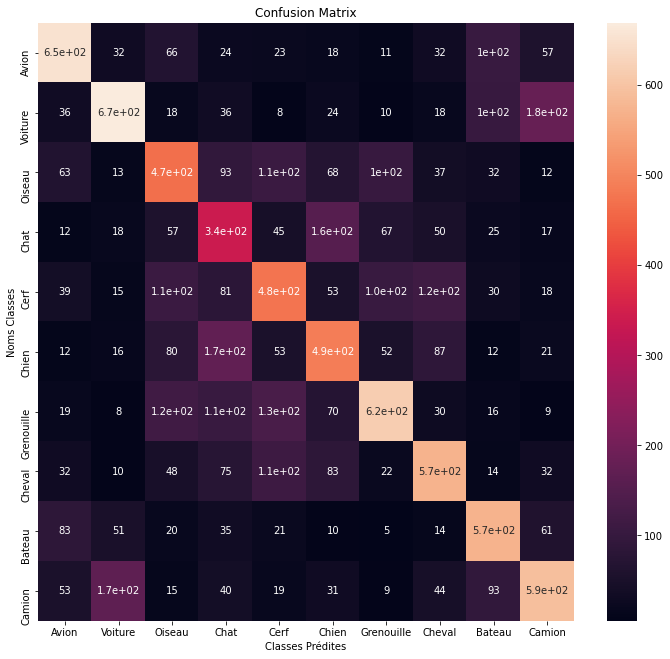

In [128]:
#Matrice de confusion
cm=confusion_matrix(knn_prediction.argmax(axis=1),y_test.argmax(axis=1))
#Affichage
plt.figure(figsize=(12,11))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# classes, titre et Tickets
ax.set_xlabel('Classes Prédites');ax.set_ylabel('Noms Classes'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(class_labels); ax.yaxis.set_ticklabels(class_labels);

# Sauvegarde des données

In [129]:
#Sauvegarde du KNN
joblib.dump(KNN, 'KNN.pkl')
# Sauvegarde des prédictions du KNN 
joblib.dump(knn_prediction, "knn_predictions.dat")

['knn_predictions.dat']